In [1]:
import sys
print(sys.executable)


c:\Python312\python.exe


In [2]:
import sys
print(sys.executable)

c:\Python312\python.exe


In [3]:
!{sys.executable} -m pip install -U ipython stack_data asttokens


In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [5]:
customers = pd.read_csv("C:\\Users\\91810\\Downloads\\Ecommerce Customers")
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
customers.columns = customers.columns.str.strip()

## EDA

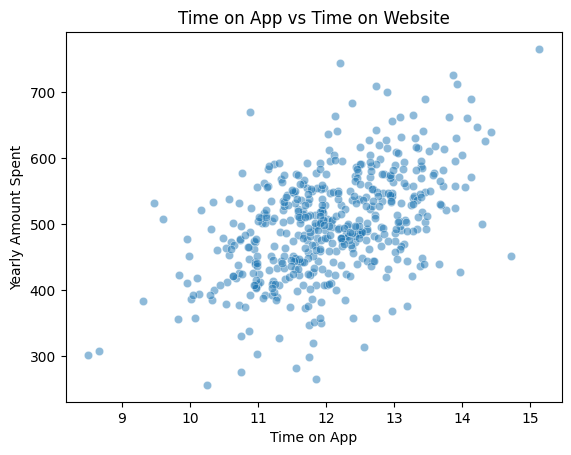

In [9]:
# SCATTERPLOT
sns.scatterplot(data=customers, x="Time on App", y="Yearly Amount Spent",alpha=0.5)
plt.title("Time on App vs Time on Website")
plt.show()

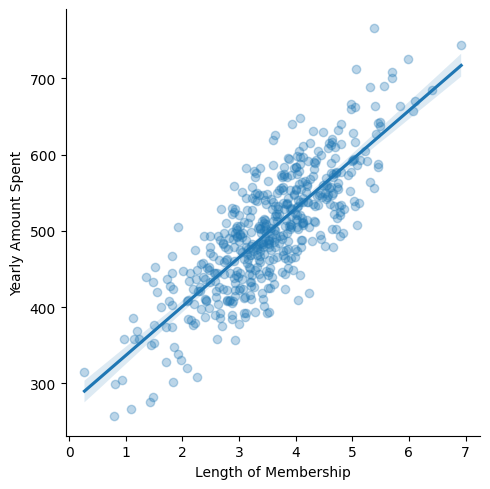

In [10]:
# LINEAR MODEL PLOT
sns.lmplot(data=customers, x="Length of Membership", 
           y="Yearly Amount Spent",
           scatter_kws={'alpha':0.3}
           )

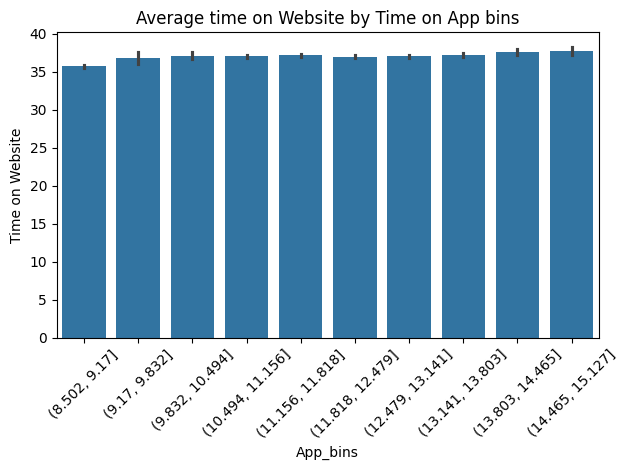

In [11]:
# BARPLOT
# bin time on app into 10 groups
customers["App_bins"] = pd.cut(customers["Time on App"],bins=10)
sns.barplot(data=customers, x="App_bins", y="Time on Website")
plt.xticks(rotation = 45)

# plot average time on website per app
plt.title("Average time on Website by Time on App bins")
plt.tight_layout()
plt.show()

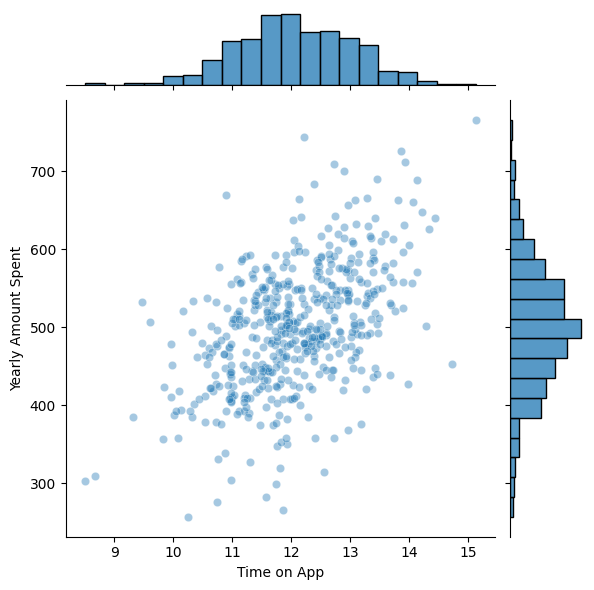

In [12]:
# JOINT PLOT
sns.jointplot(data=customers , x="Time on App", y="Yearly Amount Spent",alpha=0.4)

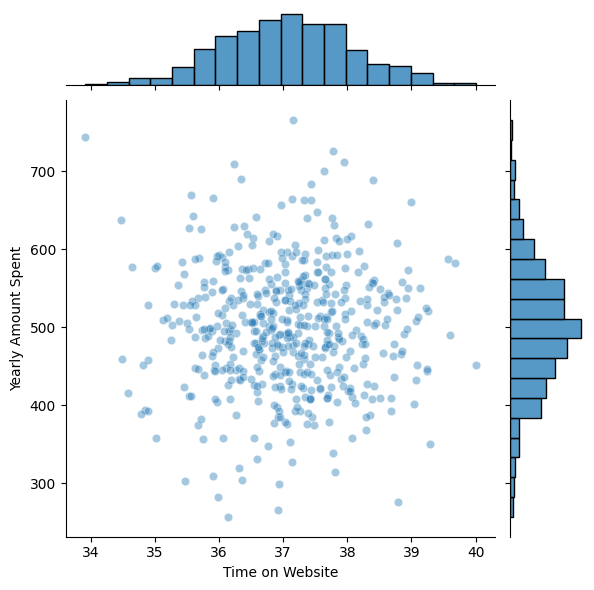

In [13]:
# JOINT PLOT
sns.jointplot(data=customers , x="Time on Website", y="Yearly Amount Spent",alpha=0.4)

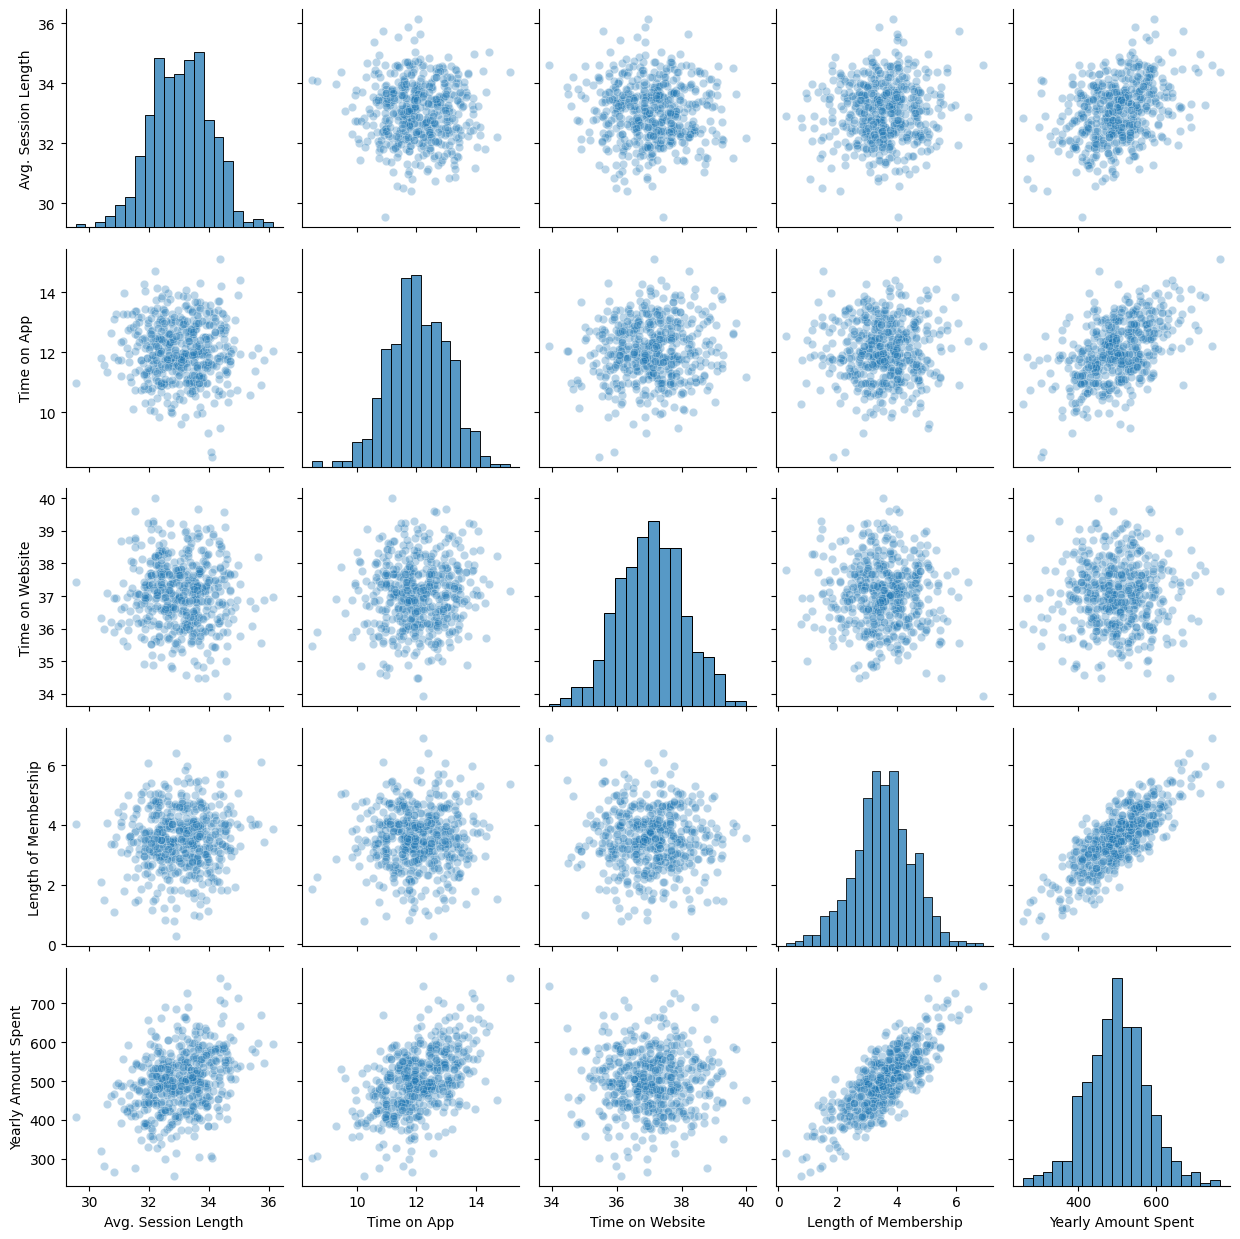

In [14]:
# PAIR PLOT
sns.pairplot(data=customers, kind = "scatter", plot_kws ={'alpha':0.3}) 
plt.tight_layout()
plt.show()

## Splitting the Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Email                 500 non-null    object  
 1   Address               500 non-null    object  
 2   Avatar                500 non-null    object  
 3   Avg. Session Length   500 non-null    float64 
 4   Time on App           500 non-null    float64 
 5   Time on Website       500 non-null    float64 
 6   Length of Membership  500 non-null    float64 
 7   Yearly Amount Spent   500 non-null    float64 
 8   App_bins              500 non-null    category
dtypes: category(1), float64(5), object(3)
memory usage: 32.3+ KB


In [17]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [18]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [19]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


# Train model Scikit-learn

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
# coefficients
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [25]:
# R squared
lm.score(X,y)

0.9842821675307221

In [26]:
# coefficients in a dataframe
cdf =  pd.DataFrame(lm.coef_,X.columns, columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


## Train model OLS

In [30]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
model_fit = model.fit()
print(model_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     5825.
Date:                 Tue, 22 Jul 2025   Prob (F-statistic):          3.46e-315
Time:                         19:04:53   Log-Likelihood:                -1296.2
No. Observations:                  350   AIC:                             2602.
Df Residuals:                      345   BIC:                             2622.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [29]:
!pip install statsmodels 

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 5.6 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.6 MB 14.7 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.6 MB 14.5 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 13.7 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 13.3 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]


## predicting test data

In [31]:
predictions = lm.predict(X_test)

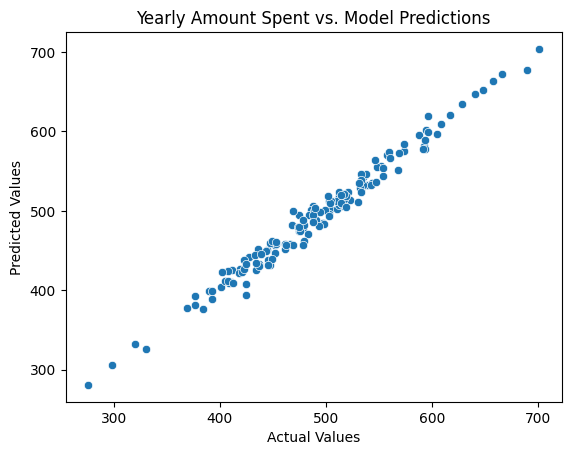

In [34]:
# Scatter plot of actual values of y vs predicted values.

sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Yearly Amount Spent vs. Model Predictions')
plt.show()

## evaluation 

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [36]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.426091641432116
Mean Squared Error: 103.91554136503333
Root Mean Squared Error: 10.193897260863155


## residual

C:\Users\91810\AppData\Local\Temp\ipykernel_15240\339810671.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

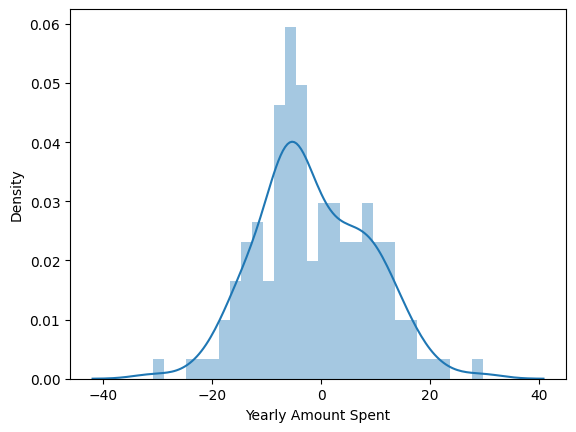

In [37]:
residuals = y_test-predictions
sns.distplot(residuals, bins=30)

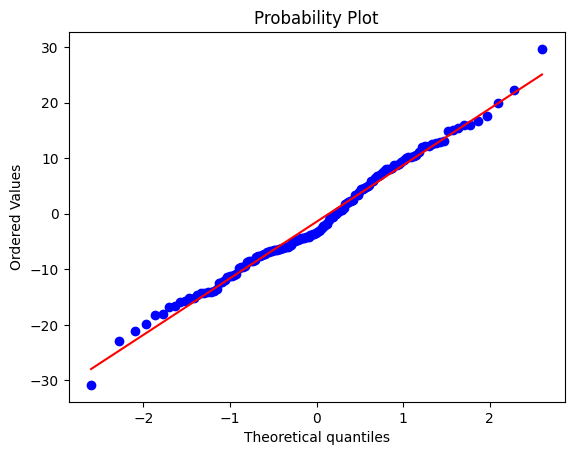

In [38]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

## multi-colinearity check

In [39]:
# === 3. Multicollinearity Check (VIF) ===
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Only use numeric features with constant added
X_train_const = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i)
                   for i in range(X_train_const.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
                feature          VIF
0                 const  2504.398685
1   Avg. Session Length     1.001417
2           Time on App     1.006448
3       Time on Website     1.005575
4  Length of Membership     1.004817


In [42]:
# === 1. Model Performance Metrics ===
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [45]:
# === 4. Conclusion ===
from IPython.display import Markdown as md

md_text = """
##  Conclusion

Our linear regression model performs reasonably well in predicting yearly spending of E-commerce clients, with an R² value of {:.2f} and RMSE of {:.2f}. The residual analysis suggests a fairly normal distribution and no severe signs of heteroscedasticity.

""".format(r2, rmse)

display(md(md_text))



##  Conclusion

Our linear regression model performs reasonably well in predicting yearly spending of E-commerce clients, with an R² value of 0.98 and RMSE of 10.19. The residual analysis suggests a fairly normal distribution and no severe signs of heteroscedasticity.



## Ridge & Lasso Regression Comparison

In [46]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

models = {
    'Linear Regression': model_fit,
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

results = {}

for name, model in models.items():
    if name == 'Linear Regression':
        pred = model.predict(sm.add_constant(X_test))
    else:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', model)
        ])
        pipe.fit(X_train, y_train)
        pred = pipe.predict(X_test)

    results[name] = {
        'MAE': mean_absolute_error(y_test, pred),
        'MSE': mean_squared_error(y_test, pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, pred)),
        'R2': r2_score(y_test, pred)
    }

# Display results
print("Model Comparison:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.3f}")


Model Comparison:

Linear Regression:
MAE: 8.426
MSE: 103.916
RMSE: 10.194
R2: 0.981

Ridge Regression:
MAE: 8.424
MSE: 103.945
RMSE: 10.195
R2: 0.981

Lasso Regression:
MAE: 8.422
MSE: 103.941
RMSE: 10.195
R2: 0.981


## customer segmentation (k-means)

c:\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


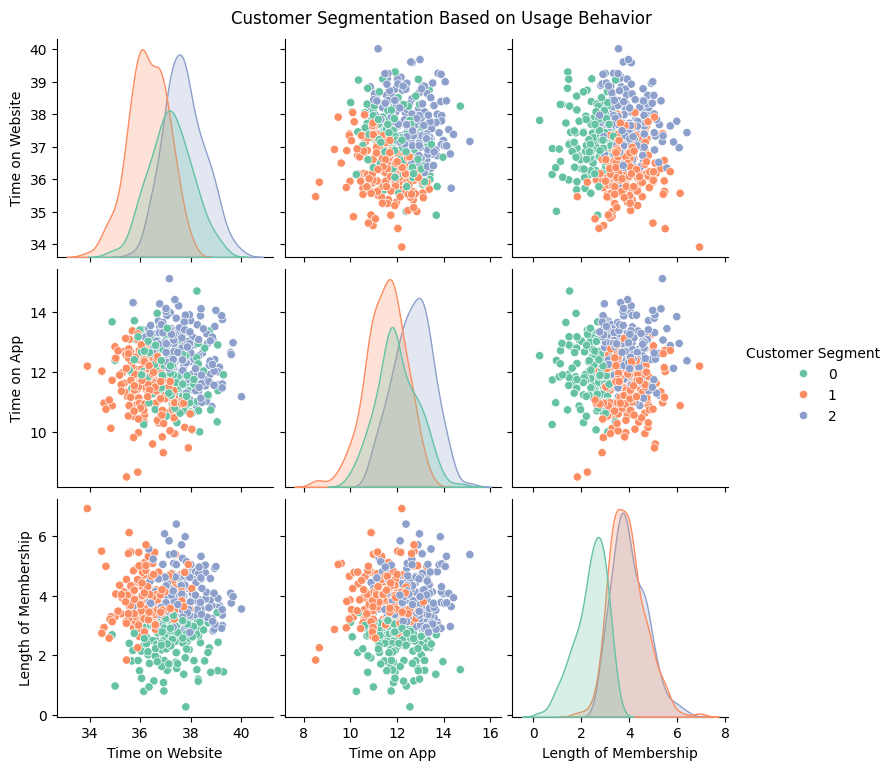

In [49]:
from sklearn.cluster import KMeans

# Use selected features for segmentation
seg_data = customers[['Time on Website', 'Time on App', 'Length of Membership']]
kmeans = KMeans(n_clusters=3, random_state=42)
customers['Customer Segment'] = kmeans.fit_predict(seg_data)

# Visualize clusters
sns.pairplot(customers, hue='Customer Segment', vars=seg_data.columns, palette='Set2')
plt.suptitle("Customer Segmentation Based on Usage Behavior", y=1.02)
plt.show()


In [50]:
import joblib
joblib.dump(model_fit, 'linear_model.pkl')

['linear_model.pkl']

In [51]:
print(X.columns)


Index(['const', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')
